In [1]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATASET_PATH = '/home/aykut/Desktop/ISIC2018_Task3_Training_Input/'

In [3]:
PREPROCESSED_TRAINING_DATASET_PATH = '/home/aykut/Desktop/ISIC2018_Task3_Preprocessed_Dataset'

In [4]:
GROUND_TRUTH_PATH = '/home/aykut/Desktop/ISIC2018_Task3_Training_GroundTruth/'

In [5]:
image_files = !ls {DATASET_PATH}
label_file = !ls {GROUND_TRUTH_PATH}
image_files = image_files[1:len(image_files)-1]
label_file = label_file[1]

In [6]:
print(len(image_files))
print(label_file)

10015
ISIC2018_Task3_Training_GroundTruth.csv


In [7]:
image_files[len(image_files) - 1]

'ISIC_0034320.jpg'

In [8]:
label_df = pd.read_csv(f'{GROUND_TRUTH_PATH}/{label_file}')

In [9]:
label_df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
columns = label_df.columns[1:]

In [11]:
index2label = {v:columns[v] for v in range(len(columns))}

In [12]:
label2index = {columns[v]:v for v in range(len(columns))}

In [13]:
index2label

{0: 'MEL', 1: 'NV', 2: 'BCC', 3: 'AKIEC', 4: 'BKL', 5: 'DF', 6: 'VASC'}

In [14]:
label2index

{'AKIEC': 3, 'BCC': 2, 'BKL': 4, 'DF': 5, 'MEL': 0, 'NV': 1, 'VASC': 6}

In [15]:
len(label_df)

10015

In [16]:
os.mkdir(path=f'{PREPROCESSED_TRAINING_DATASET_PATH}')

FileExistsError: [Errno 17] File exists: '/home/aykut/Desktop/ISIC2018_Task3_Preprocessed_Dataset'

In [33]:
os.mkdir(path=f'{PREPROCESSED_TRAINING_DATASET_PATH}/train')

FileExistsError: [Errno 17] File exists: '/home/aykut/Desktop/ISIC2018_Task3_Preprocessed_Dataset/train'

In [34]:
os.mkdir(path=f'{PREPROCESSED_TRAINING_DATASET_PATH}/val')

FileExistsError: [Errno 17] File exists: '/home/aykut/Desktop/ISIC2018_Task3_Preprocessed_Dataset/val'

In [35]:
os.mkdir(path=f'{PREPROCESSED_TRAINING_DATASET_PATH}/test')

FileExistsError: [Errno 17] File exists: '/home/aykut/Desktop/ISIC2018_Task3_Preprocessed_Dataset/test'

In [17]:
for _type in ['train', 'test', 'val']:
    for col in columns:
        os.mkdir(path=f'{PREPROCESSED_TRAINING_DATASET_PATH}/{_type}/{col}')

FileExistsError: [Errno 17] File exists: '/home/aykut/Desktop/ISIC2018_Task3_Preprocessed_Dataset/train/MEL'

In [18]:
true_labels = label_df.values[:, 1:]

In [19]:
counter = 0
dataset = []
labels = []
for img_file in image_files:
    file_path = f'{DATASET_PATH}{img_file}'
    if counter % 1000 == 0:
        print(file_path)
    image = cv2.imread(file_path)
    image =cv2.resize(image, (224, 224))
    label = index2label[true_labels[counter].argmax(axis=0)]
    dataset.append([image_files[counter], image.ravel()])
    #dataset.append(image.ravel())
    labels.append(label)
    counter += 1

/home/aykut/Desktop/ISIC2018_Task3_Training_Input/ISIC_0024306.jpg
/home/aykut/Desktop/ISIC2018_Task3_Training_Input/ISIC_0025306.jpg
/home/aykut/Desktop/ISIC2018_Task3_Training_Input/ISIC_0026306.jpg
/home/aykut/Desktop/ISIC2018_Task3_Training_Input/ISIC_0027306.jpg
/home/aykut/Desktop/ISIC2018_Task3_Training_Input/ISIC_0028306.jpg
/home/aykut/Desktop/ISIC2018_Task3_Training_Input/ISIC_0029306.jpg
/home/aykut/Desktop/ISIC2018_Task3_Training_Input/ISIC_0030306.jpg
/home/aykut/Desktop/ISIC2018_Task3_Training_Input/ISIC_0031306.jpg
/home/aykut/Desktop/ISIC2018_Task3_Training_Input/ISIC_0032306.jpg
/home/aykut/Desktop/ISIC2018_Task3_Training_Input/ISIC_0033306.jpg
/home/aykut/Desktop/ISIC2018_Task3_Training_Input/ISIC_0034306.jpg


In [20]:
dataset = np.array(dataset, dtype=object)
labels = np.array(labels)

In [21]:
trainset, testset, trainlabel, testlabel = train_test_split(dataset, labels, test_size=0.3, stratify=labels, random_state=42)

In [22]:
valset, testset, vallabels, testlabels = train_test_split(testset, testlabel, test_size=0.5, stratify=testlabel, random_state=42)

In [23]:
trainset[0, 0]

'ISIC_0026323.jpg'

In [26]:
image = np.reshape(trainset[260, 1], (224, 224, 3))

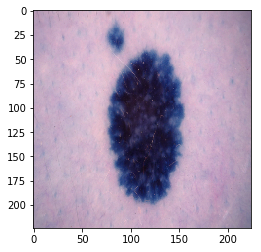

In [27]:
plt.imshow(image)

In [28]:
count = 0
for i, sample in enumerate(trainset):
    if count % 1000 == 0:
        print(count)
    label = trainlabel[i]
    img = np.reshape(sample[1], (224, 224, 3))
    name = sample[0]
    cv2.imwrite(f'{PREPROCESSED_TRAINING_DATASET_PATH}/train/{label}/{name}', img)
    count += 1

0
1000
2000
3000
4000
5000
6000
7000


In [29]:
count = 0
for i, sample in enumerate(testset):
    if count % 1000 == 0:
        print(count)
    label = testlabels[i]
    img = np.reshape(sample[1], (224, 224, 3))
    name = sample[0]
    cv2.imwrite(f'{PREPROCESSED_TRAINING_DATASET_PATH}/test/{label}/{name}', img)
    count += 1

0
1000


In [30]:
count = 0
for i, sample in enumerate(valset):
    if count % 1000 == 0:
        print(count)
    label = vallabels[i]
    img = np.reshape(sample[1], (224, 224, 3))
    name = sample[0]
    cv2.imwrite(f'{PREPROCESSED_TRAINING_DATASET_PATH}/val/{label}/{name}', img)
    count += 1

0
1000


# Keras Models

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

/home/aykut/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [32]:
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight

In [33]:
class_weights = compute_class_weight(class_weight='balanced', classes = np.unique(trainlabel), y=trainlabel)

In [34]:
class_weights

array([ 4.37305053,  2.78174603,  1.30224782, 12.3633157 ,  1.2855309 ,
        0.21338772, 10.11544012])

In [35]:
train_label_numeric = [label2index[label] for label in trainlabel]

In [36]:
train_label_numeric = np.array(train_label_numeric)

In [37]:
trainlabel = to_categorical(train_label_numeric, 7)

In [38]:
test_label_numeric = [label2index[label] for label in testlabels]
val_label_numeric = [label2index[label] for label in vallabels]

In [39]:
testlabel = to_categorical(test_label_numeric, 7)
vallabel = to_categorical(val_label_numeric, 7)

In [43]:
for sample in trainset:
    print(sample[1].shape)
    break

(150528,)


In [44]:
trainset = np.array([np.reshape(sample[1], (224, 224, 3)) for sample in trainset])

In [45]:
datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=180,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=[0.9, 1.5],
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

In [47]:
datagen.fit(trainset, augment=True, seed=42)

In [48]:
valgen = ImageDataGenerator(rescale=1./255)

In [50]:
valset = np.array([np.reshape(sample[1], (224, 224, 3)) for sample in valset])
valgen.fit(valset, augment=True)

In [51]:
from keras import applications
from keras.models import Sequential, Model
from keras import optimizers
from keras.callbacks import ModelCheckpoint

In [52]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))
modelcheckpoint = ModelCheckpoint('best_model.hdf5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True, mode='auto', period=1)

In [53]:
for layer in model.layers[:10]:
    layer.trainable = False

In [54]:
callbacks_list = [modelcheckpoint]

In [55]:
from keras.optimizers import Adam

In [56]:
#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = Adam(lr=1e-5), metrics=['categorical_accuracy'])

/home/aykut/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [57]:
model_final.fit_generator(datagen.flow(trainset, trainlabel, batch_size=16),
                    epochs=100, 
                    validation_data=valgen.flow(valset, vallabel),
                    validation_steps=100,   
                    steps_per_epoch=64,
                    class_weight=class_weights, callbacks=callbacks_list)

Epoch 1/100


ResourceExhaustedError: OOM when allocating tensor with shape[16,64,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: block1_conv1/convolution = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](block1_conv1/convolution-0-TransposeNHWCToNCHW-LayoutOptimizer, block1_conv1/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: loss/mul/_391 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1447_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [46]:
testgen = ImageDataGenerator(rescale=1./255)
testset = np.array([np.reshape(sample, (224, 224, 3)) for sample in testset])
testgen.fit(testset, augment=True)

In [47]:
model_final.load_weights('best_model.hdf5')
print(model_final.evaluate_generator(testgen.flow(testset, testlabel, batch_size=32)))

[0.49182461585827214, 0.8276779769423479]
